In [59]:
creator= "Group: Federico Innocenti mail: fed.innocenti1@stud.uniroma3.it ,   \
Daniele Cinque mail : dan.cinque@stud.uniroma3.it ,   \
Rosalia moffa : ros.moffa@stud.uniroma3.it   \
e    \
Giulia orlandi : giu.orlandi2@stud.uniroma3.it"

print(creator)

Group: Federico Innocenti mail: fed.innocenti1@stud.uniroma3.it ,   Daniele Cinque mail : dan.cinque@stud.uniroma3.it ,   Rosalia moffa : ros.moffa@stud.uniroma3.it   e    Giulia orlandi : giu.orlandi2@stud.uniroma3.it


In [60]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt

import seaborn as sns
nltk.download('wordnet')  

%matplotlib inline

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [61]:
#Installation of Hugging Faces Library 

#! pip install transformers

In [62]:
#Installation of Hugging Faces Dataset 
# !pip install datasets

In [63]:
#!pip install PyTorch
#!pip install TensorFlow 

In [64]:
## 1 Using Different approach for Text Processing and Vectorization and Compare Result 
## 2 Vary the model and compare with Multinomial Naive Bayes 
## 3 use texblob 
## 4 create a vocabulary of positive/negative words which positive/neg words are found in tweet classified as positive/negative , which is their distrib ?= 

### Step 0 : Creation of DF; Part of Creation of a subset of Amazon Review from Hugging Faces , it is commented because we directly import it as csv for seek of reproducibility

In [65]:
#from transformers import pipeline

In [66]:
#from datasets import load_dataset
#dataset_train = load_dataset('amazon_polarity', split='train')


In [67]:
#dataset_train

In [68]:
#df = pd.DataFrame(dataset)

In [69]:
#df[:99782].to_csv("amazon_review.csv", index=False)

## Step 1 : Import Amazon Review and Pre-Processing

In [70]:
df= pd.read_csv("amazon_review.csv")
df

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
99777,1,THE POLY SCI MAJOR WAS FORCED TO READ THIS,The last thing i wanted to do was invest time ...
99778,0,Moby Dick DVD,You are never too old to learn something new. ...
99779,1,John Huston does himself & Melville proud,"Huston, although necessarily simplifying the c..."
99780,0,"Great movie, false advertising",One of the truly great movies by John Huston a...


In [71]:
df.describe()

,label
count,99782.000000
mean,0.512748
std,0.499840
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [72]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [73]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [74]:
import re #for using regular expressions

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    
    #simple tokenization using split()
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)    # Convert more than 2 letter repetitions to 2 letter (e.g., cooool)
    tweet = re.sub(r"\s+", " ", str(tweet))      # Replaces extra spaces with a single space    
    return tweet


In [75]:
df['processed_tweet'] = np.vectorize(process_tweet)(df["content"])

df.head(10)

,label,title,content,processed_tweet
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...
5,1,an absolute masterpiece,I am quite sure any of you actually taking the...,am quite sure any of you actually taking the ...
6,0,Buyer beware,"This is a self-published book, and if you want...",this is self published book and if you want to...
7,1,Glorious story,I loved Whisper of the wicked saints. The stor...,loved whisper of the wicked saints the story ...
8,1,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...,just finished reading whisper of the wicked s...
9,1,Whispers of the Wicked Saints,This was a easy to read book that made me want...,this was easy to read book that made me want t...


## Step 2 : processing   
in particular we apply:    
- stopword removal   
- stemming
- lemmatization 

### Stopword Removal df ( df['clean_tweet_stopwords_removal'] )

In [76]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [77]:
def stopwords_removal(tweet):
    from nltk.corpus import stopwords
    stopwords = stopwords.words("english")
    
    cleaned_tweet = ""

    for w in tweet.split():
        if w not in stopwords:
            cleaned_tweet = cleaned_tweet +" "+w

    return cleaned_tweet

In [78]:
processed_tweet = df.columns.values[3]

df['clean_tweet_stopwords_removal'] = np.vectorize(stopwords_removal)(df[processed_tweet])

df.head(10)

,label,title,content,processed_tweet,clean_tweet_stopwords_removal
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...,sound track beautiful paints senery mind well...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...,reading lot reviews saying best game soundtra...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense ...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...,truly like soundtrack enjoy video game music ...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...,played game know divine music every single so...
5,1,an absolute masterpiece,I am quite sure any of you actually taking the...,am quite sure any of you actually taking the ...,quite sure actually taking time read played g...
6,0,Buyer beware,"This is a self-published book, and if you want...",this is self published book and if you want to...,self published book want know read paragraphs...
7,1,Glorious story,I loved Whisper of the wicked saints. The stor...,loved whisper of the wicked saints the story ...,loved whisper wicked saints story amazing ple...
8,1,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...,just finished reading whisper of the wicked s...,finished reading whisper wicked saints fell l...
9,1,Whispers of the Wicked Saints,This was a easy to read book that made me want...,this was easy to read book that made me want t...,easy read book made want keep reading easy pu...


### Stemming df (df['clean_stemmed_tweet'] )

In [79]:

def tweet_stemmer(tweet):
    from nltk.stem import SnowballStemmer

    snowball = SnowballStemmer("english")

    stemmed_tweet = ""
    for w in tweet.split():
        stemmed_tweet = stemmed_tweet +" "+snowball.stem(w)

    return stemmed_tweet

In [80]:
clean_tweet = df.columns.values[4]

df['clean_stemmed_tweet'] = np.vectorize(tweet_stemmer)(df[clean_tweet])

df.head(10)

,label,title,content,processed_tweet,clean_tweet_stopwords_removal,clean_stemmed_tweet
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...,sound track beautiful paints senery mind well...,sound track beauti paint seneri mind well wou...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...,reading lot reviews saying best game soundtra...,read lot review say best game soundtrack figu...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense ...,soundtrack favorit music time hand intens sad...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...,truly like soundtrack enjoy video game music ...,truli like soundtrack enjoy video game music ...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...,played game know divine music every single so...,play game know divin music everi singl song t...
5,1,an absolute masterpiece,I am quite sure any of you actually taking the...,am quite sure any of you actually taking the ...,quite sure actually taking time read played g...,quit sure actual take time read play game lea...
6,0,Buyer beware,"This is a self-published book, and if you want...",this is self published book and if you want to...,self published book want know read paragraphs...,self publish book want know read paragraph st...
7,1,Glorious story,I loved Whisper of the wicked saints. The stor...,loved whisper of the wicked saints the story ...,loved whisper wicked saints story amazing ple...,love whisper wick saint stori amaz pleasant s...
8,1,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...,just finished reading whisper of the wicked s...,finished reading whisper wicked saints fell l...,finish read whisper wick saint fell love cara...
9,1,Whispers of the Wicked Saints,This was a easy to read book that made me want...,this was easy to read book that made me want t...,easy read book made want keep reading easy pu...,easi read book made want keep read easi put l...


### Lemmatization df :df['clean_lemmatized_tweet'])

In [81]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\finnocenti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#def lemmatize_tweets(tweet):
#  tweet = lemmatizer.lemmatize(tweet , pos ="a")
#  return tweet

In [83]:
def tweet_lemmatizer(tweet):
    from nltk import WordNetLemmatizer

    lemma = WordNetLemmatizer()
    
    lemmatized_tweet = ""
    
    for w in tweet.split():
        lemmatized_tweet = lemmatized_tweet+" "+lemma.lemmatize(w, pos='v')
    return lemmatized_tweet

In [84]:
df.columns.values[3]

'processed_tweet'

In [85]:
clean_tweet = df.columns.values[3]
df['clean_lemmatized_tweet'] = np.vectorize(tweet_lemmatizer)(df[clean_tweet])


In [86]:
df

,label,title,content,processed_tweet,clean_tweet_stopwords_removal,clean_stemmed_tweet,clean_lemmatized_tweet
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...,sound track beautiful paints senery mind well...,sound track beauti paint seneri mind well wou...,this sound track be beautiful it paint the se...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...,reading lot reviews saying best game soundtra...,read lot review say best game soundtrack figu...,read lot of review say that this be the best ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense ...,soundtrack favorit music time hand intens sad...,this soundtrack be my favorite music of all t...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...,truly like soundtrack enjoy video game music ...,truli like soundtrack enjoy video game music ...,truly like this soundtrack and enjoy video ga...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...,played game know divine music every single so...,play game know divin music everi singl song t...,if you have play the game you know how divine...
...,...,...,...,...,...,...,...
99777,1,THE POLY SCI MAJOR WAS FORCED TO READ THIS,The last thing i wanted to do was invest time ...,the last thing wanted to do was invest time re...,last thing wanted invest time reading massive...,last thing want invest time read massiv tomb ...,the last thing want to do be invest time read...
99778,0,Moby Dick DVD,You are never too old to learn something new. ...,you are never too old to learn something new w...,never old learn something new aware dvd regio...,never old learn someth new awar dvd region on...,you be never too old to learn something new b...
99779,1,John Huston does himself & Melville proud,"Huston, although necessarily simplifying the c...",huston although necessarily simplifying the co...,huston although necessarily simplifying compl...,huston although necessarili simplifi complex ...,huston although necessarily simplify the comp...
99780,0,"Great movie, false advertising",One of the truly great movies by John Huston a...,one of the truly great movies by john huston a...,one truly great movies john huston first give...,one truli great movi john huston first give r...,one of the truly great movies by john huston ...


## Step 3 : Feature Extraction 

In [87]:
tweets_4 = df['clean_lemmatized_tweet']
tweets_3 = df['clean_stemmed_tweet']
tweets_2 = df['clean_tweet_stopwords_removal']
tweets_1 = df['processed_tweet']

using **TF-IDF** (*Term-Frequency-Inverse-Document Frequency*)

In [88]:
def feature_extraction(tweets):
    from sklearn.feature_extraction.text import TfidfVectorizer 

    tf_idf_vectorizer = TfidfVectorizer(use_idf = True, ngram_range=(1,3))
    final_vectorized_data_TFIDF = tf_idf_vectorizer.fit_transform(tweets)
    return final_vectorized_data_TFIDF


In [89]:
feature_extraction_1 = feature_extraction(tweets_1)

In [90]:
feature_extraction_2= feature_extraction(tweets_2)

In [91]:
feature_extraction_3= feature_extraction(tweets_3)

In [92]:
feature_extraction_4= feature_extraction(tweets_4)

## Step 4: Sentiment Classification Definition

In [93]:
def split(total_data , final_vectorized_data , sentiment):
    #with CountVectorizer
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data[sentiment],
                                                    test_size=0.2, random_state=69)  
    return  X_train, X_test, y_train, y_test

In [94]:
sentiment = df.columns.values[0]
X_train_1, X_test_1, y_train_1, y_test_1 = split(df , feature_extraction_1 , sentiment)

In [95]:
sentiment = df.columns.values[0]
X_train_2, X_test_2, y_train_2, y_test_2 = split(df , feature_extraction_2 , sentiment)

In [96]:
sentiment = df.columns.values[0]
X_train_3, X_test_3, y_train_3, y_test_3 = split(df , feature_extraction_3 , sentiment)

In [97]:
sentiment = df.columns.values[0]
X_train_4, X_test_4, y_train_4, y_test_4 = split(df , feature_extraction_4 , sentiment)

In [98]:
print("X_train_shape: ",X_train_1.shape)
print("X_test_shape: ",X_test_1.shape)
print("y_train_shape: ",y_train_1.shape)
print("y_test_shape: ",y_test_1.shape)

X_train_shape:  (79825, 5935537)
X_test_shape:  (19957, 5935537)
y_train_shape:  (79825,)
y_test_shape:  (19957,)


In [99]:
def MultinomialNB(X_train, y_train , X_test ):
    from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

    model_naive = MultinomialNB().fit(X_train, y_train) 
    predicted_naive = model_naive.predict(X_test)
    return predicted_naive , model_naive

In [100]:
def plot_confusion_matrix(y_test,predicted_naive , title= 'Confusion Matrix for Naive Bayes'):
    from sklearn.metrics import confusion_matrix

    plt.figure(dpi=100)
    mat = confusion_matrix(y_test, predicted_naive)
    sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

    plt.title(title)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

In [101]:
def accuracy(predicted_naive ,y_test, title="Accuracy with Naive-bayes:" ):
    from sklearn.metrics import accuracy_score

    score_naive = accuracy_score(predicted_naive, y_test)
    return print(title, score_naive)

In [102]:
def classification_report(predicted_naive , y_test):
    from sklearn.metrics import classification_report
    return print(classification_report(y_test, predicted_naive))

In [103]:
def roc_curve(X_test ,y_test , model_naive):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model_naive.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(dpi=100)                       # to plot high quality graph
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', color='g')
    plt.xlabel('False Positive Rate', color='r')
    plt.show()

In [104]:
def final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= 'Confusion Matrix for Naive Bayes' , title_accuracy= "Accuracy with Naive-bayes:" ):
    plot_confusion_matrix(y_test,predicted_naive , title= title_confusion_matrix)
    accuracy(predicted_naive ,y_test, title=title_accuracy)
    classification_report(predicted_naive , y_test)
    roc_curve(X_test ,y_test , model_naive)


## Modelling Multinomial Naive Bayes for all 4 different dataset 

tweets_4 are lemmatized tweet   
tweets_3 are stemmed tweet   
tweets_2 are stopwords removal tweet   
tweets_1 are only processed tweet   

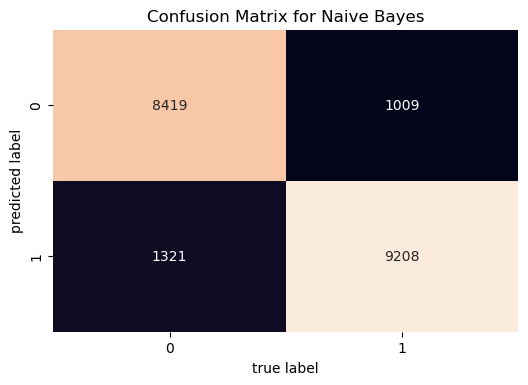

Accuracy with Naive-bayes: 0.8832489853184347
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      9740
           1       0.87      0.90      0.89     10217

    accuracy                           0.88     19957
   macro avg       0.88      0.88      0.88     19957
weighted avg       0.88      0.88      0.88     19957



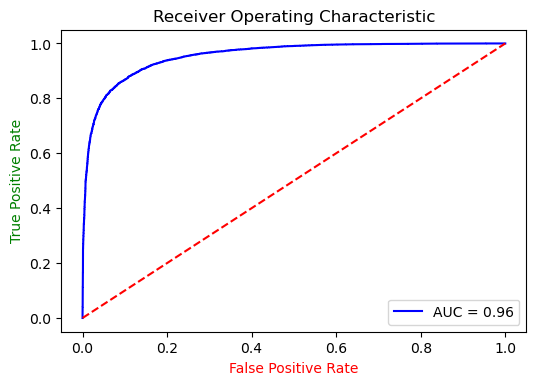

In [105]:
X_train=X_train_1 
y_train=y_train_1
X_test=X_test_1
y_test= y_test_1 
title_confusion_matrix= 'Confusion Matrix for Naive Bayes' 
title_accuracy= "Accuracy with Naive-bayes:"

predicted_naive , model_naive = MultinomialNB(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

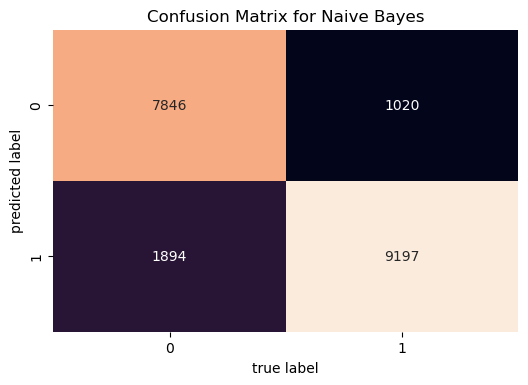

Accuracy with Naive-bayes: 0.8539860700506088
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      9740
           1       0.83      0.90      0.86     10217

    accuracy                           0.85     19957
   macro avg       0.86      0.85      0.85     19957
weighted avg       0.86      0.85      0.85     19957



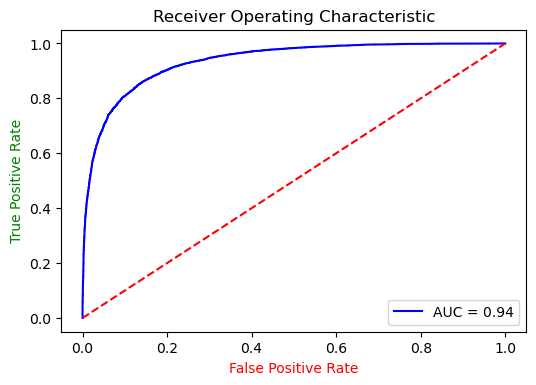

In [106]:
X_train=X_train_2 
y_train=y_train_2
X_test=X_test_2
y_test= y_test_2 
title_confusion_matrix= 'Confusion Matrix for Naive Bayes' 
title_accuracy= "Accuracy with Naive-bayes:"

predicted_naive , model_naive = MultinomialNB(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

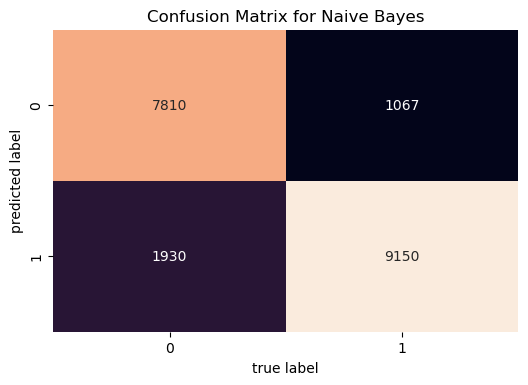

Accuracy with Naive-bayes: 0.8498271283259007
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      9740
           1       0.83      0.90      0.86     10217

    accuracy                           0.85     19957
   macro avg       0.85      0.85      0.85     19957
weighted avg       0.85      0.85      0.85     19957



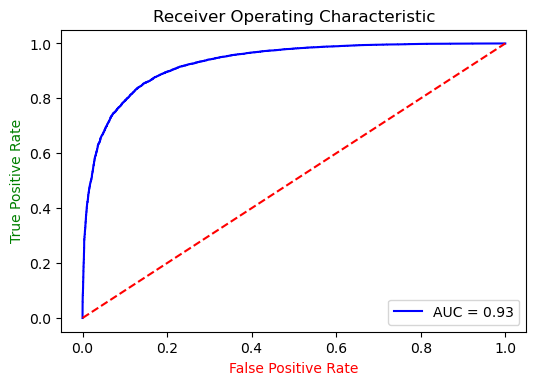

In [107]:
X_train=X_train_3
y_train=y_train_3
X_test=X_test_3
y_test= y_test_3 
title_confusion_matrix= 'Confusion Matrix for Naive Bayes' 
title_accuracy= "Accuracy with Naive-bayes:"

predicted_naive , model_naive = MultinomialNB(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

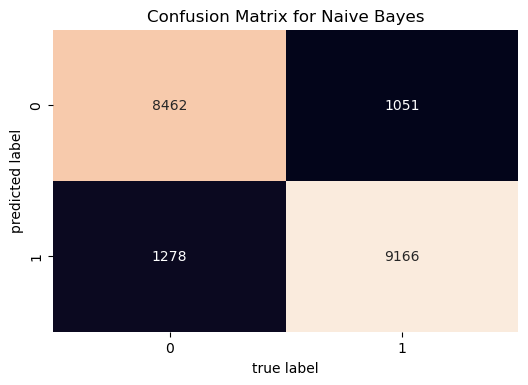

Accuracy with Naive-bayes: 0.8832990930500576
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      9740
           1       0.88      0.90      0.89     10217

    accuracy                           0.88     19957
   macro avg       0.88      0.88      0.88     19957
weighted avg       0.88      0.88      0.88     19957



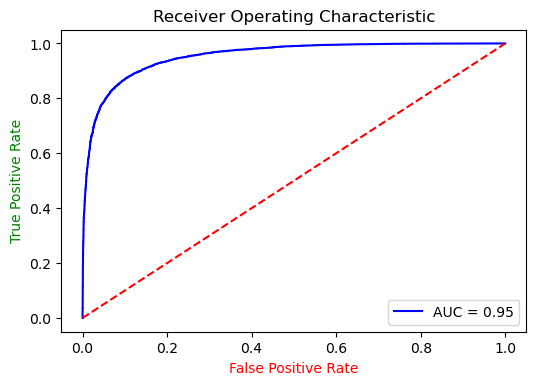

In [108]:
X_train=X_train_4
y_train=y_train_4
X_test=X_test_4
y_test= y_test_4 
title_confusion_matrix= 'Confusion Matrix for Naive Bayes' 
title_accuracy= "Accuracy with Naive-bayes:"

predicted_naive , model_naive = MultinomialNB(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

## Bernoulli Model 

In [109]:
from sklearn.naive_bayes import BernoulliNB 

In [110]:
def BernoulliNB (X_train, y_train , X_test ):
    from sklearn.naive_bayes import BernoulliNB   # Naive Bayes Classifier

    model_naive = BernoulliNB().fit(X_train, y_train) 
    predicted_naive = model_naive.predict(X_test)
    return predicted_naive , model_naive

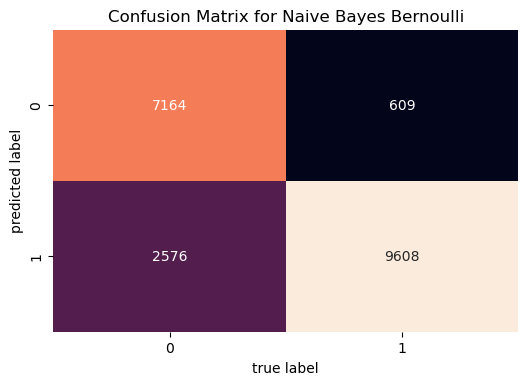

Accuracy with Naive-bayes Bernoulli: 0.8404068747807787
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9740
           1       0.79      0.94      0.86     10217

    accuracy                           0.84     19957
   macro avg       0.86      0.84      0.84     19957
weighted avg       0.85      0.84      0.84     19957



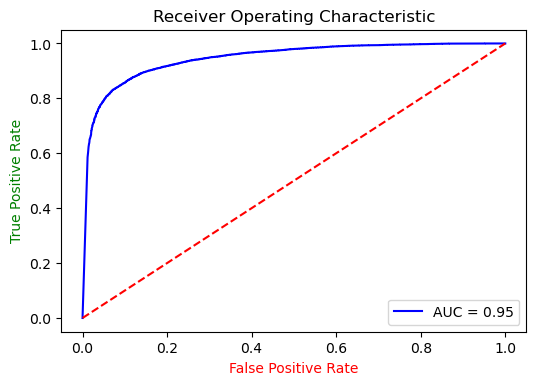

In [111]:
X_train=X_train_1 
y_train=y_train_1
X_test=X_test_1
y_test= y_test_1 
title_confusion_matrix= 'Confusion Matrix for Naive Bayes Bernoulli' 
title_accuracy= "Accuracy with Naive-bayes Bernoulli:"

predicted_naive , model_naive = BernoulliNB(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

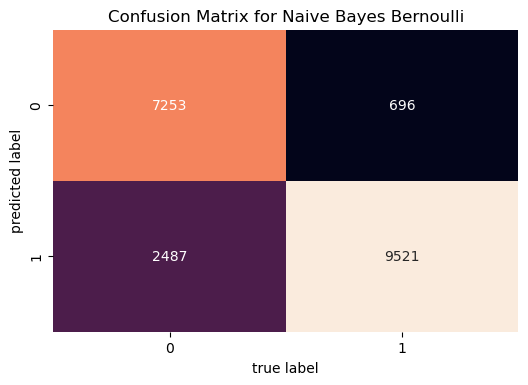

Accuracy with Naive-bayes Bernoulli: 0.8405070902440247
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      9740
           1       0.79      0.93      0.86     10217

    accuracy                           0.84     19957
   macro avg       0.85      0.84      0.84     19957
weighted avg       0.85      0.84      0.84     19957



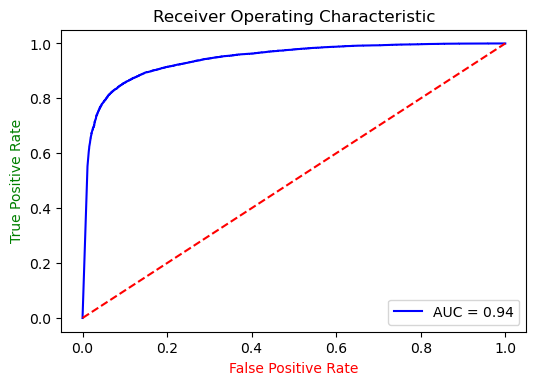

In [112]:
X_train=X_train_4 
y_train=y_train_4
X_test=X_test_4
y_test= y_test_4 
title_confusion_matrix= 'Confusion Matrix for Naive Bayes Bernoulli' 
title_accuracy= "Accuracy with Naive-bayes Bernoulli:"

predicted_naive , model_naive = BernoulliNB(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

## Random Forest Model 

In [113]:
from sklearn.ensemble import RandomForestClassifier 

In [114]:
def Random_Forest (X_train, y_train , X_test ):
    from sklearn.naive_bayes import BernoulliNB   # Naive Bayes Classifier

    #model_naive = RandomForestClassifier().fit(X_train, y_train) 
    clf = RandomForestClassifier(max_depth=10, random_state=0)
    model_naive = clf.fit(X_train, y_train)
    predicted_naive = model_naive.predict(X_test)
    return predicted_naive , model_naive

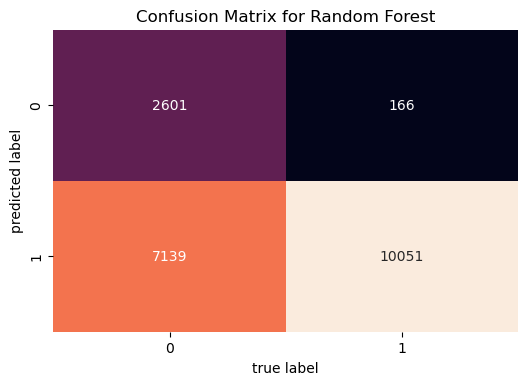

Accuracy with Random Forest: 0.6339630204940623
              precision    recall  f1-score   support

           0       0.94      0.27      0.42      9740
           1       0.58      0.98      0.73     10217

    accuracy                           0.63     19957
   macro avg       0.76      0.63      0.57     19957
weighted avg       0.76      0.63      0.58     19957



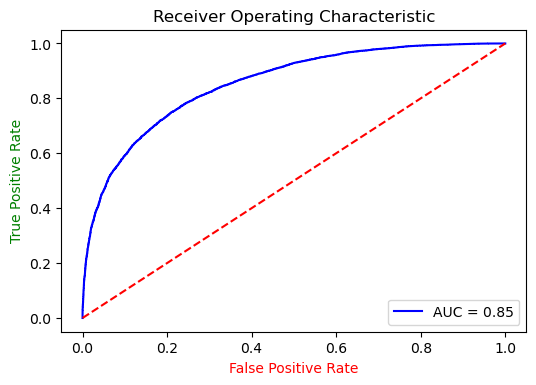

In [115]:
X_train=X_train_1 
y_train=y_train_1
X_test=X_test_1
y_test= y_test_1 
title_confusion_matrix= 'Confusion Matrix for Random Forest' 
title_accuracy= "Accuracy with Random Forest:"

predicted_naive , model_naive = Random_Forest(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

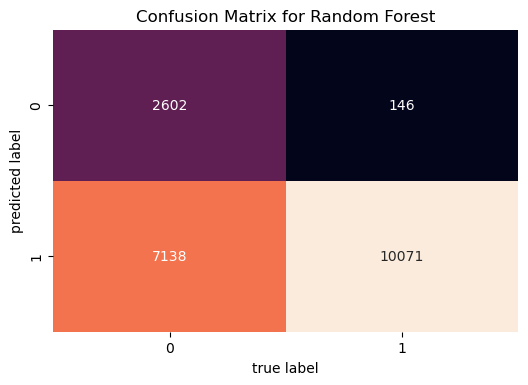

Accuracy with Random Forest: 0.635015282858145
              precision    recall  f1-score   support

           0       0.95      0.27      0.42      9740
           1       0.59      0.99      0.73     10217

    accuracy                           0.64     19957
   macro avg       0.77      0.63      0.58     19957
weighted avg       0.76      0.64      0.58     19957



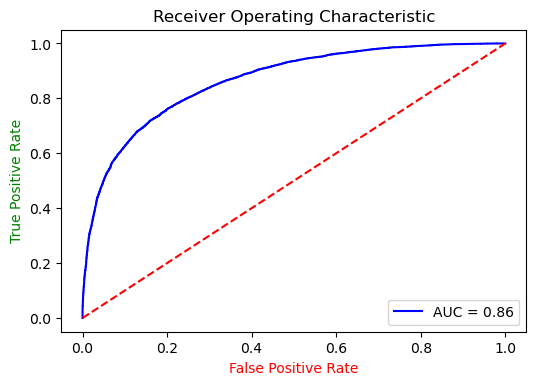

In [116]:
X_train=X_train_4 
y_train=y_train_4
X_test=X_test_4
y_test= y_test_4 
title_confusion_matrix= 'Confusion Matrix for Random Forest' 
title_accuracy= "Accuracy with Random Forest:"

predicted_naive , model_naive = Random_Forest(X_train, y_train , X_test )
final_summary(X_test , y_test ,predicted_naive , model_naive, title_confusion_matrix= title_confusion_matrix , title_accuracy= title_accuracy )

## Hugging Faces Model 

In [117]:
#!pip install torch
#!pip install TensorFlow 

In [118]:
#test
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
classifier(df["content"][0])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9991727471351624}]

In [119]:
df["hugging_faces_output"]=0

In [120]:
def hugging_model(df, data_processed=1000,df_filter="content" ):
   
    from transformers import pipeline
    classifier = pipeline('sentiment-analysis')
    for k,i in enumerate(df[df_filter][:data_processed]):
            df["hugging_faces_output"][k] = classifier(i)[0]['label']
    df["hugging_faces_output"][df["hugging_faces_output"]=="POSITIVE"]=1
    df["hugging_faces_output"][df["hugging_faces_output"]=="NEGATIVE"]=0
    df["hugging_faces_output"]= pd.to_numeric(df["hugging_faces_output"], errors='coerce') 
    return df["hugging_faces_output"]

In [121]:
def hugging_metrics(df, data_processed=1000):
    plot_confusion_matrix(df["label"][:data_processed],df["hugging_faces_output"][:data_processed] , title= 'Confusion Matrix for hugging_faces_output')
    accuracy(df["hugging_faces_output"][:data_processed] ,df["label"][:data_processed], title="Accuracy with hugging_faces_output" )
    classification_report(df["hugging_faces_output"][:data_processed] ,df["label"][:data_processed])

In [122]:
df["hugging_faces_output"]=0 

In [123]:
df["hugging_faces_output"]= hugging_model(df, data_processed=1000,df_filter="processed_tweet" )

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
C:\Users\finnocenti\AppData\Local\Temp\ipykernel_21520\1504480264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hugging_faces_output"][k] = classifier(i)[0]['label']


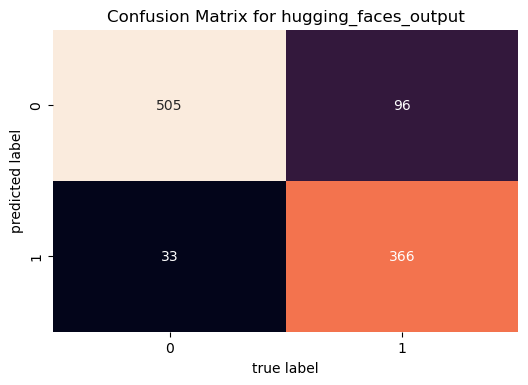

Accuracy with hugging_faces_output 0.871
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       538
           1       0.92      0.79      0.85       462

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



In [124]:
hugging_metrics(df, data_processed=1000)

In [125]:
df["hugging_faces_output"]=0 

In [126]:
df["hugging_faces_output"]= hugging_model(df, data_processed=1000,df_filter="clean_lemmatized_tweet" )

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
C:\Users\finnocenti\AppData\Local\Temp\ipykernel_21520\1504480264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hugging_faces_output"][k] = classifier(i)[0]['label']


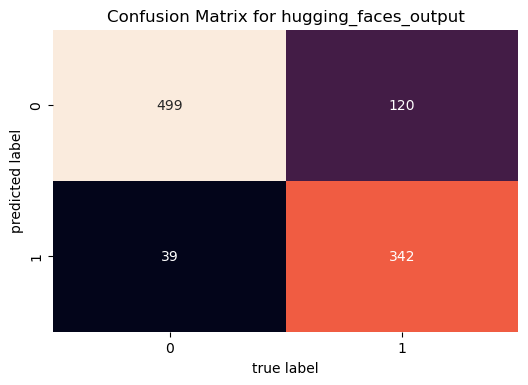

Accuracy with hugging_faces_output 0.841
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       538
           1       0.90      0.74      0.81       462

    accuracy                           0.84      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [127]:
hugging_metrics(df, data_processed=1000)

### Extra and Other 

In [128]:
data_processed=1000
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
for k,i in enumerate(df["content"][:data_processed]):
        df["hugging_faces_output"][k] = classifier(i)[0]['label']
     

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
C:\Users\finnocenti\AppData\Local\Temp\ipykernel_21520\1740568398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hugging_faces_output"][k] = classifier(i)[0]['label']


In [129]:
df.head(25)

,label,title,content,processed_tweet,clean_tweet_stopwords_removal,clean_stemmed_tweet,clean_lemmatized_tweet,hugging_faces_output
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...,sound track beautiful paints senery mind well...,sound track beauti paint seneri mind well wou...,this sound track be beautiful it paint the se...,POSITIVE
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...,reading lot reviews saying best game soundtra...,read lot review say best game soundtrack figu...,read lot of review say that this be the best ...,POSITIVE
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense ...,soundtrack favorit music time hand intens sad...,this soundtrack be my favorite music of all t...,POSITIVE
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...,truly like soundtrack enjoy video game music ...,truli like soundtrack enjoy video game music ...,truly like this soundtrack and enjoy video ga...,POSITIVE
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...,played game know divine music every single so...,play game know divin music everi singl song t...,if you have play the game you know how divine...,POSITIVE
5,1,an absolute masterpiece,I am quite sure any of you actually taking the...,am quite sure any of you actually taking the ...,quite sure actually taking time read played g...,quit sure actual take time read play game lea...,be quite sure any of you actually take the ti...,POSITIVE
6,0,Buyer beware,"This is a self-published book, and if you want...",this is self published book and if you want to...,self published book want know read paragraphs...,self publish book want know read paragraph st...,this be self publish book and if you want to ...,NEGATIVE
7,1,Glorious story,I loved Whisper of the wicked saints. The stor...,loved whisper of the wicked saints the story ...,loved whisper wicked saints story amazing ple...,love whisper wick saint stori amaz pleasant s...,love whisper of the wicked saint the story be...,POSITIVE
8,1,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...,just finished reading whisper of the wicked s...,finished reading whisper wicked saints fell l...,finish read whisper wick saint fell love cara...,just finish read whisper of the wicked saint ...,POSITIVE
9,1,Whispers of the Wicked Saints,This was a easy to read book that made me want...,this was easy to read book that made me want t...,easy read book made want keep reading easy pu...,easi read book made want keep read easi put l...,this be easy to read book that make me want t...,POSITIVE


In [130]:
df["hugging_faces_output"][df["hugging_faces_output"]=="POSITIVE"]

0      POSITIVE
1      POSITIVE
2      POSITIVE
3      POSITIVE
4      POSITIVE
         ...   
991    POSITIVE
993    POSITIVE
994    POSITIVE
997    POSITIVE
999    POSITIVE
Name: hugging_faces_output, Length: 450, dtype: object

In [131]:
df["hugging_faces_output"][df["hugging_faces_output"]=="POSITIVE"]=1

In [132]:
df["hugging_faces_output"][df["hugging_faces_output"]=="NEGATIVE"]=0

In [133]:
df[:data_processed]

,label,title,content,processed_tweet,clean_tweet_stopwords_removal,clean_stemmed_tweet,clean_lemmatized_tweet,hugging_faces_output
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...,sound track beautiful paints senery mind well...,sound track beauti paint seneri mind well wou...,this sound track be beautiful it paint the se...,1
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...,reading lot reviews saying best game soundtra...,read lot review say best game soundtrack figu...,read lot of review say that this be the best ...,1
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense ...,soundtrack favorit music time hand intens sad...,this soundtrack be my favorite music of all t...,1
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...,truly like soundtrack enjoy video game music ...,truli like soundtrack enjoy video game music ...,truly like this soundtrack and enjoy video ga...,1
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...,played game know divine music every single so...,play game know divin music everi singl song t...,if you have play the game you know how divine...,1
...,...,...,...,...,...,...,...,...
995,0,Fuzzy around the edges,I have only read the first 44 pages of this bo...,have only read the first pages of this book s...,read first pages book need read rest far thou...,read first page book need read rest far thoug...,have only read the first page of this book so...,0
996,0,Brain Based Learning: The New Paradigm of Teac...,I am currently reading the Kindle version of t...,am currently reading the kindle version of th...,currently reading kindle version book book ea...,current read kindl version book book easi rea...,be currently read the kindle version of this ...,0
997,1,Brain based Learning,This is a text book I ordered for my classes f...,this is text book ordered for my classes for t...,text book ordered classes teacher certificati...,text book order class teacher certif book eas...,this be text book order for my class for teac...,1
998,0,Pop psychology at its worst,I find it hard to believe people fall for this...,find it hard to believe people fall for this ...,find hard believe people fall stuff writes mu...,find hard believ peopl fall stuff write much ...,find it hard to believe people fall for this ...,0


In [134]:
df["hugging_faces_output"]= pd.to_numeric(df["hugging_faces_output"], errors='coerce') 

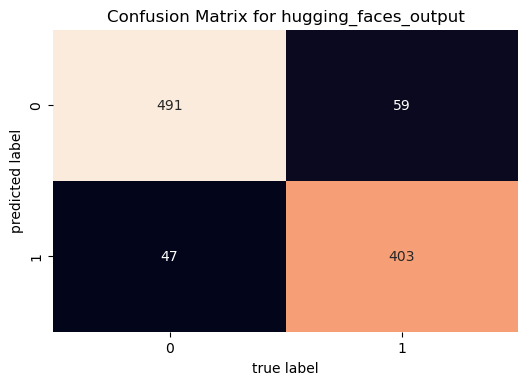

In [135]:
plot_confusion_matrix(df["label"][:data_processed],df["hugging_faces_output"][:data_processed] , title= 'Confusion Matrix for hugging_faces_output')


In [136]:
accuracy(df["hugging_faces_output"][:data_processed] ,df["label"][:data_processed], title="Accuracy with hugging_faces_output" )

Accuracy with hugging_faces_output 0.894


In [137]:

classification_report(df["hugging_faces_output"][:data_processed] ,df["label"][:data_processed])
#roc_curve(X_test ,y_test , model_naive)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       538
           1       0.90      0.87      0.88       462

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [138]:
df["hugging_faces_output"]=0 
df

,label,title,content,processed_tweet,clean_tweet_stopwords_removal,clean_stemmed_tweet,clean_lemmatized_tweet,hugging_faces_output
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...,sound track beautiful paints senery mind well...,sound track beauti paint seneri mind well wou...,this sound track be beautiful it paint the se...,0
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading lot of reviews saying that this is th...,reading lot reviews saying best game soundtra...,read lot review say best game soundtrack figu...,read lot of review say that this be the best ...,0
2,1,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense ...,soundtrack favorit music time hand intens sad...,this soundtrack be my favorite music of all t...,0
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like this soundtrack and enjoy video ga...,truly like soundtrack enjoy video game music ...,truli like soundtrack enjoy video game music ...,truly like this soundtrack and enjoy video ga...,0
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",if you have played the game you know how divin...,played game know divine music every single so...,play game know divin music everi singl song t...,if you have play the game you know how divine...,0
...,...,...,...,...,...,...,...,...
99777,1,THE POLY SCI MAJOR WAS FORCED TO READ THIS,The last thing i wanted to do was invest time ...,the last thing wanted to do was invest time re...,last thing wanted invest time reading massive...,last thing want invest time read massiv tomb ...,the last thing want to do be invest time read...,0
99778,0,Moby Dick DVD,You are never too old to learn something new. ...,you are never too old to learn something new w...,never old learn something new aware dvd regio...,never old learn someth new awar dvd region on...,you be never too old to learn something new b...,0
99779,1,John Huston does himself & Melville proud,"Huston, although necessarily simplifying the c...",huston although necessarily simplifying the co...,huston although necessarily simplifying compl...,huston although necessarili simplifi complex ...,huston although necessarily simplify the comp...,0
99780,0,"Great movie, false advertising",One of the truly great movies by John Huston a...,one of the truly great movies by john huston a...,one truly great movies john huston first give...,one truli great movi john huston first give r...,one of the truly great movies by john huston ...,0


In [139]:
df["hugging_faces_output"]= hugging_model(df, data_processed=1000,df_filter="processed_tweet" )

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
C:\Users\finnocenti\AppData\Local\Temp\ipykernel_21520\1504480264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hugging_faces_output"][k] = classifier(i)[0]['label']


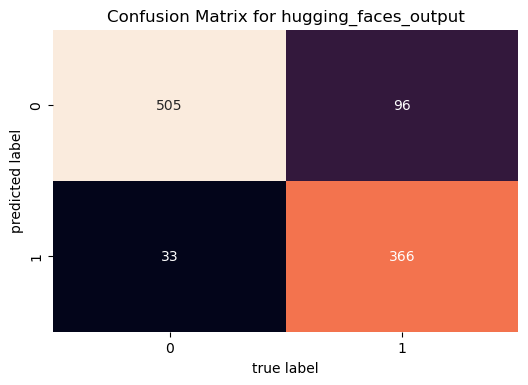

Accuracy with hugging_faces_output 0.871
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       538
           1       0.92      0.79      0.85       462

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



In [140]:
hugging_metrics(df, data_processed=1000)